<a href="https://drive.google.com/file/d/1UnY5oGW_B8I6Z-6Zm3LOKh2TQf2bct9d/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>**SC3000 Assignment 1 Balancing a Pole on a Cart**<center></h1>

---


<center><img src="https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png" href="https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png"></center>


##### Source: https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png

<hr></hr>

<h2><center><strong>Lab Group : A42<strong><center></h2>
<h2><center>Group Name: <strong>PoleDancer</strong><center></h2>
<ul>
<li>Brendon Tan : Task 1, 2, 3, 4</li>
<li>Hendy : Task 1, 2, 3, 4</li>
<li>Wong Ri Hong : Task 1, 2, 3, 4</li>
</ul>

<hr></hr>


Reference: https://medium.com/swlh/using-q-learning-for-openais-cartpole-v1-4a216ef237df


### Installing dependencies:

> Indented block



###### Reference:
###### Python Gymnasium source: https://gymnasium.farama.org/


## Install Library

In [37]:
!pip install requests
!pip install scores
!pip install gymnasium

!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing dependencies and define helper functions

In [38]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
from gym.wrappers.monitoring import video_recorder
gymlogger.set_level(40) #error only
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import os
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

## Loading CartPole environment

Create an instance of the CartPole environment to train and test our reinforcement learning agents.

In [39]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [40]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to \

cart position, velocity and pole angle, angular velocity.

In [41]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [42]:
observation = env.reset()
print("Initial observations:", observation)


print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Initial observations: [-0.03632507 -0.01967221  0.01076161  0.04790096]
Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right.

For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [43]:
observation, reward, done, info = env.step(0)
#observation, reward, done, info, terminated, truncated = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing action 0: [-0.03671851 -0.2149468   0.01171962  0.34395975]
Reward for this step: 1.0
Is this round done? False


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [44]:
env = gym.make("CartPole-v1")
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 9.0


## Task 1: Development of an RL agent

## Initialize parameters for Q-learning

In [45]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 8000
total_reward = 0
prior_reward = 0

observation = env.reset()
print("Initial observations:", observation)
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))


Observation = [4, 4, 10, 40]
np_array_win_size = np.array([2.5, 2.5, 0.1, 0.25])
epsilon = 1
epsilon_decay_value = 0.99944

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))

Initial observations: [ 0.01532218  0.04055052  0.00839458 -0.00849409]
Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


This is our Q-learning model. 

**We set our learning rate to be low at 0.1** because we do not want the agent to overreact to new information which will cause it to overwrite its old information. 

**Our discount rate is 0.95** to accommodate long term rewards.
We determine the number of episodes of 8000 to be sufficient for the exploration (not too low/high) and exploitation for the Q-learning agent.
We initialize total reward and prior reward to 0.


**We set the observation space to be [4, 4, 10, 40]** as the first 2 variables (Cartpole position and cartpole velocity) are not as important as the next 2 variables (Pole Angle and pole velocity). It is unlikely that the cartpole will end up at the extreme ends of the boundary (edge of the display) and the velocity is bounded by a small range. Whereas for the pole, when it topples, it will definitely reach the extreme angles.


Similarly, **we set the window size to be [2.5, 2.5, 0.1, 0.25]** for a similar reason, for more precision on pole angle and velocity as these 2 factors are more important then cartpole position and velocity.


Initialisation of epsilon to 1 is because there is no information to exploit initially.
**We determine that the epsilon decay value of 0.99944** is sufficient for our model’s exploitation.


We initialize the Q-table with random values (0 or 1) for each state-action pair in the environment since the agent has no knowledge initially of which action to take to maximize the reward.



In [46]:
def get_discrete_state(state):
    discrete_state = state/np_array_win_size + np.array([2,2,5,20])
    return tuple(discrete_state.astype(int))

We define a function **get_discrete_state** to classify each state into a discrete state based on which window it fits into. 

**We add [2,2,5,20]** to the discrete array to avoid negative indexing in our Q-table.

## Q learning, train the agent on 8000 episodes

In [47]:
env = gym.make("CartPole-v1")
for episode in range(EPISODES + 1): 
    
    #Initializing starting state for each epsiode in the given environment range
     
    discrete_state = get_discrete_state(env.reset())   
    done = False
    episode_reward = 0 

    if episode % 1000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) # exploit
        else:

            action = np.random.randint(0, env.action_space.n) #explore

        new_state, reward, done, info = env.step(action) #get new state and reward after taking the action above
        episode_reward += reward # add reward to current episode total reward
        new_discrete_state = get_discrete_state(new_state) # discretize the new state
           
        if not done: 
            max_future_q = np.max(q_table[new_discrete_state]) #get max reward from q table
            
            # Using bellman equation to calculate new q-value
            
            current_q = q_table[discrete_state + (action,)] 

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state # Replace current state with the new discrete state

    if epsilon > 0.07:  # Prevent epsilon from dropping too low, so that the model will keep exploring even at high episodes
        if episode_reward > prior_reward and episode > 3500: # If episode reward is greater than previous episode reward, it means that our model is improving, so we should exploit more
                                                              #Set to 3500 for sufficient exploration before exploitation begins
            epsilon = math.pow(epsilon_decay_value, episode - 3500) #Decreasing Epsilon value so that the model will exploit more

    if episode % 1000 == 0:
        print("Epsilon: " + str(epsilon))

    # For checking mean reward after every 1000 episodes                
    total_reward += episode_reward 
    prior_reward = episode_reward # Save a record of the current episode reward to be used for comparison with future episode rewards

    if episode % 1000 == 0 and episode > 999 : 
        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

#print(q_table)
env.close()

Episode: 0
Epsilon: 1
Episode: 1000
Epsilon: 1
Mean Reward: 22.49
Episode: 2000
Epsilon: 1
Mean Reward: 22.796
Episode: 3000
Epsilon: 1
Mean Reward: 21.813
Episode: 4000
Epsilon: 0.7557244682042218
Mean Reward: 26.978
Episode: 5000
Epsilon: 0.4318507955848175
Mean Reward: 91.924
Episode: 6000
Epsilon: 0.24677659318136919
Mean Reward: 259.355
Episode: 7000
Epsilon: 0.14085999176701425
Mean Reward: 391.247
Episode: 8000
Epsilon: 0.08103584693015892
Mean Reward: 419.569


For each episode, we initialize the variables and environment.

For each episode, while it is not done(out of bounds/pole tilted past angle) or truncated (episode length greater than 500), we generate a random value. If the value is greater than epsilon, the agent will exploit the values in the Q-table, otherwise it will explore and choose a random action.

After taking the action, we get the values of the new state and increment the episode reward by, then we discretize the new state.

If the new state is valid, we calculate the new Q-value for the state-action pair using the Bellman equation. Afterwards, we replace the old discrete state with the new one.

We set the minimum value of epsilon at 0.07, so that the agent will always be able to explore even at higher episodes and not drop close to 0 due to the decay. In order to decrement epsilon, we check 2 conditions: If the current episode’s reward is greater than the previous, meaning the model is improving and the agent should exploit more; If the episode is greater than 3500, to ensure the agent has explored sufficiently initially before beginning to exploit, to avoid convergence to a suboptimal policy.

We allow Exploitation with **np.argmax(q_table[discrete_state])**
while also allow explotation **np.random.randint(0, env.action_space.n)** to ensure no unbiased assumption are made.

Using bellman equation to calculate new q-value to populate the next value iteration.

Before the end of each episode, we save a record of the current episode’s reward so it can be compared against in the next episode.


# Reinforcment Learning agent based on the Q-values we obtained

We define our own Reinforcement learning agent as **Reinforcement_Learning_agent** function 

We use the max value of the Q table to return the action to be taken.

In [48]:
def Reinforcement_Learning_agent(state):
    discrete_state=get_discrete_state(state)
    action = np.argmax(q_table[discrete_state]) 
    return action

For Task 1, we can show the observation and chosen action below:

In [49]:
observation = env.reset()
action = Reinforcement_Learning_agent(observation)
print("Observation:", observation)
print("Chosen action:", action)

Observation: [-0.01926352 -0.04444255  0.01948535 -0.02222965]
Chosen action: 0


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

In [50]:
env = gym.make("CartPole-v1")
test_episodes=100
episode_results = []

for test_episode in range(test_episodes):
    initial_state=env.reset()
    state=initial_state
    cumulative_reward = 0
    done=False
    while not done:
        action = Reinforcement_Learning_agent(state)
        state, reward, done, info = env.step(action)
        cumulative_reward += reward
        #env.render()
    episode_results.append(cumulative_reward)
  #print("Cumulative reward for this round:", cumulative_reward)



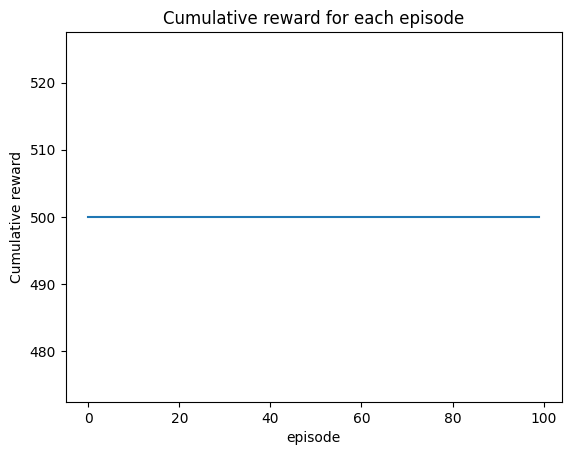

In [51]:
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

Print the average reward over the 100 episodes.

In [53]:
print("Average reward: ", sum(episode_results) / len(episode_results))
print("Is my agent good enough?", sum(episode_results) / len(episode_results) > 195)

Average reward:  500.0
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [54]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
print(env)
initial_observation = env.reset()
observation=initial_observation
i = 0
done=False
while not done:
    i += 1
    env.render()
    #your agent goes here
    action = Reinforcement_Learning_agent(observation)
    observation, reward, done, info = env.step(action)
    if done: 
        print(i)
        break;    
print(i)
env.close()
show_video()



<RecordVideo<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>>
500
500


## Task 4: Format the Jupyter notebook by including step-by-step instruction and explanation

**Done**